Ajustar un modelo para el conjunto de datos. El conjunto de datos contiene información de una
población con la cual se intenta predecir si puede o no cobrar más de 50.000 dólares anuales.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:
#leer conjunto de datos
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais','ganancia']
# Load the Census dataset
data = pd.read_csv("./datos/adult.data",names=columnas, na_values=['?'] )
display(data.head(5))
len(data)

,edad,clase_de_trabajo,cantidad_personas,educacion,anios_de_estudio,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_de_capital,horas_por_semana,pais,ganancia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


32561

Prepare el conjunto de datoselimine los valores incompletos para este conjunto de datos		 y transforme las variables categóricas a dummies. 

In [3]:
# valores faltantes por columna
display(data.isnull().sum())
#eliminar datos faltantes
data=data.dropna(axis = 0)
len(data)

edad                     0
clase_de_trabajo      1836
cantidad_personas        0
educacion                0
anios_de_estudio         0
estado_civil             0
ocupacion             1843
relaciones               0
raza                     0
sexo                     0
ganancia_capital         0
perdida_de_capital       0
horas_por_semana         0
pais                   583
ganancia                 0
dtype: int64

30162

In [4]:
data_complete=data.drop(labels=['cantidad_personas'] , axis=1)
display(data.describe())
display(data.corr())
display(data.dtypes)
#explore data 
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k =  len(data[data['ganancia'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['ganancia'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k*100)/n_records,2)
print("total:",str(n_records))
print(">50k:",n_greater_50k)
print("<=50k:",n_at_most_50k)

,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana
edad,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
cantidad_personas,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
anios_de_estudio,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
ganancia_capital,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
perdida_de_capital,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
horas_por_semana,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


edad                   int64
clase_de_trabajo      object
cantidad_personas      int64
educacion             object
anios_de_estudio       int64
estado_civil          object
ocupacion             object
relaciones            object
raza                  object
sexo                  object
ganancia_capital       int64
perdida_de_capital     int64
horas_por_semana       int64
pais                  object
ganancia              object
dtype: object

total: 30162
>50k: 7508
<=50k: 22654


In [5]:
# Split the data into features and target label
Y = data['ganancia']
X = data.drop(labels=['ganancia'],axis=1)

columnas=list(data.columns)
tipos=list(data.dtypes)


def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)
            
            
X_dummies=function_dummies(X)
display(X_dummies.head(5))
# TODO: Encode the 'income_raw' data to numerical values
Y = Y.str.replace('<=50K','0')
Y = Y.replace('>50K','1')


,edad,cantidad_personas,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


1.1.1 Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30 (genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó). Indique que cantidad de casos quedaron para cada ambiente.

In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


print(">50k train",y_train[y_train=='1'].count())
print("<50 train",y_train[y_train=='0'].count())

print(">50k test",y_test[y_test=='1'].count())
print("<50 test",y_test[y_test=='0'].count())


Training set has 21113 samples.
Testing set has 9049 samples.
>50k train 5223
<50 train 15890
>50k test 2285
<50 test 6764


1.1.2 Ajuste el mejor modelo posible . Indique el modelo con todas sus variables.

In [7]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                          #  min_samples_split=1000,
                                          #  min_samples_leaf=500,
                                            max_depth = 4
                                           )
decision_tree=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')


decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

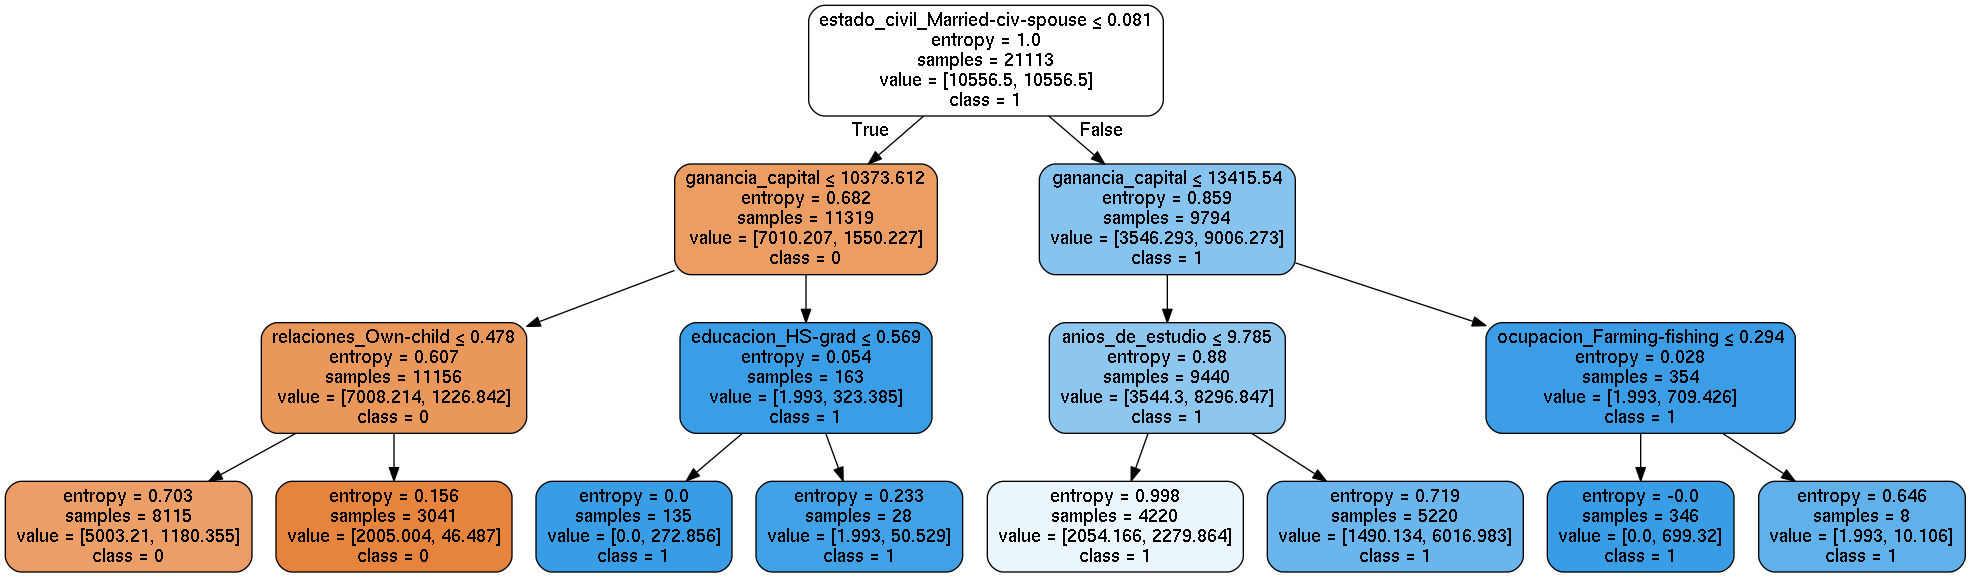

In [52]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

Calcular  la perfomarnce y el AUC y el gráfico ROC en entrenamiento y validación indicando también el total de casos de cada una de las clases.

In [83]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [84]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,auc

#Predict the response for test dataset
y_pred_test = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)

#n_samples / (n_classes * np.bincount(y))

display('Test:',confusion_matrix(y_test, y_pred_test))
display('Train:',confusion_matrix(y_train, y_pred_train))


print("accuracy test:",accuracy_score(y_test, y_pred_test))
print("accuracy train:",accuracy_score(y_train, y_pred_train))



tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

ac=(tp+tn)/(tn+ fp+ fn+ tp)

# Pretty display for notebooks
%matplotlib inline
#plot_confusion_matrix(y_test, y_pred_test, Y)

    

#plot_confusion_matrix(y_train, y_pred_train, Y)


#plot_confusion_matrix(y_test, y_pred_test, Y,
 #                     normalize=True,
  #                    title='Normalized confusion matrix')

'Test:'

array([[4538, 2226],
       [ 278, 2007]])

'Train:'

array([[10799,  5091],
       [  607,  4616]])

accuracy test: 0.723284340811
accuracy train: 0.7301188841
verdaderos positivos: 2007
verdaderos negativos: 4538
falsos positivos: 2226
falsos negativos: 278


              precision    recall  f1-score   support

           0       0.94      0.67      0.78      6764
           1       0.47      0.88      0.62      2285

   micro avg       0.72      0.72      0.72      9049
   macro avg       0.71      0.77      0.70      9049
weighted avg       0.82      0.72      0.74      9049



15639    False
29059    False
27523    False
9280     False
Name: ganancia, dtype: bool

15639    0
29059    0
27523    0
9280     0
Name: ganancia, dtype: object

AUC test: 0.82


array([ 0.        ,  0.32909521,  1.        ])

array([ 0.        ,  0.87833698,  1.        ])

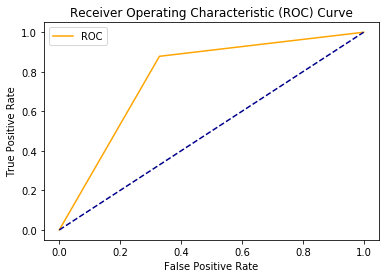

In [85]:
#AUC curva ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    


print(classification_report(y_test, y_pred_test))    

probs_test = decision_tree.predict_proba(X_test)    

data_set_test=X_test.copy()
data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test



y_true='1' <= y_test
data_set_test['verdadero']=y_true


y_pred_true='1' <= y_pred_test
display(y_true[1:5])
display(y_test[1:5])

#y_test_modelo=data_set_test.sort(['predicho_prob_1'], ascending=[False])


auc_test = roc_auc_score(y_test, data_set_test['predicho_prob_1']
                      )
#auc_test = roc_auc_score(y_true, y_pred_true)
#auc_test = roc_auc_score(y_test_modelo['verdadero'], 
 #                        y_test_modelo['predicho_prob_1'])


print('AUC test: %.2f' % auc_test)

#fpr, tpr, thresholds = roc_curve(y_true, data_set_test['predicho_prob_1'])
fpr, tpr, thresholds = roc_curve(y_true, y_pred_true)
#fpr, tpr, thresholds = roc_curve(y_test_modelo['verdadero'], 
 #                               y_test_modelo['predicho_prob_1'])


display(fpr)
display(tpr)


plot_roc_curve(fpr, tpr)
#display(data_set_test.head(10))
#
#display(balanced_accuracy_score(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.95      0.68      0.79     15890
           1       0.48      0.88      0.62      5223

   micro avg       0.73      0.73      0.73     21113
   macro avg       0.71      0.78      0.70     21113
weighted avg       0.83      0.73      0.75     21113

AUC train: 0.78


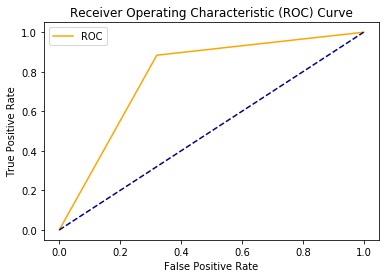

0.78169654190865856

In [86]:
probs_train = decision_tree.predict_proba(X_train)    

data_set_train=X_train.copy()
data_set_train['predicho']=y_pred_train
data_set_train['predicho_prob_1']=probs_train[:,1]
data_set_train['predicho_prob_0']=probs_train[:,0]
data_set_train['real']=y_train

print(classification_report(y_train, y_pred_train)) 

y_true='1' <= y_train
y_pred_true='1' <= y_pred_train

auc_train = roc_auc_score(y_true, y_pred_true)
print('AUC train: %.2f' % auc_train)



fpr, tpr, thresholds = roc_curve(y_true, y_pred_true)
#fpr, tpr, thresholds = roc_curve(y_true, data_set_train['predicho_prob_1'])

plot_roc_curve(fpr, tpr)
#display(data_set_train.head(10))


from sklearn.metrics import balanced_accuracy_score
display(balanced_accuracy_score(y_train, y_pred_train))




1.1.4 Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la siguiente lógica. Entregue los resultados indicados:
Al azar e indique la cantidad de individuos que cobran más de 50.000 dólares.
Utilizando el modelo desarrollado e indique la cantidad de individuos que cobran más de 50.000 dólares.

In [88]:
X_test_75, X_test_25, y_test_75, y_test_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

#cantidad de individuos >50k al azar
print ("total 25%",y_test_25.count())
print(">50k test 25% azar",y_test_25[y_test_25=='1'].count())

##cantidad de individuos >50k modelo
y_test_modelo=data_set_test.sort(['predicho_prob_1'], ascending=[False])[1:y_test_25.count()]
print(">50k test 25% modelo",len(y_test_modelo[y_test_modelo['real'] == '1']))
#data_set_test.sort_values(by='predicho_prob_1', ascending=False)

total 25% 2263
>50k test 25% azar 548
>50k test 25% modelo 1263


In [59]:
# Ejemplo cross-validation
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

modelo = tree.DecisionTreeClassifier(criterion='entropy',
                                          #  min_samples_split=1000,
                                          #  min_samples_leaf=500,
                                            max_depth = 4
                                           )

scores = cross_val_score(modelo, X_dummies, Y, cv=10)
display(scores)
display(scores.mean())


array([ 0.83062645,  0.83725555,  0.84090156,  0.82963208,  0.84350133,
        0.8428382 ,  0.84383289,  0.85179045,  0.84875622,  0.83383085])

0.84029655740782483

[0.72338996595721639,
 0.72604137507562561,
 0.73738798927620997,
 0.73349258583533616]

0.73007797903609706

0.73000415250180162

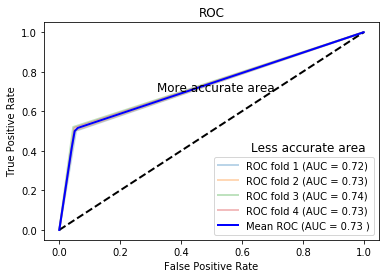

In [60]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=4,shuffle=False)
from sklearn.preprocessing import label_binarize
from scipy import interp

tprs = []
aucs = []
i = 1
mean_fpr = np.linspace(0,1,100)
#display(mean_fpr)



for train,test in cv.split(X_dummies,Y):
    prediction = modelo.fit(X_dummies.iloc[train],
                            Y.iloc[train]).predict(X_dummies.iloc[test])
    
    y_bin_t = label_binarize(Y.iloc[test], classes=['0', '1'])
    y_bin_p = label_binarize(prediction, classes=['0', '1'])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin_t.ravel(), y_bin_p.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    aucs.append(roc_auc["micro"])
    tprs.append(interp(mean_fpr,  fpr["micro"], tpr["micro"]))
    plt.plot(fpr["micro"],  tpr["micro"], lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc["micro"]))
    i= i+1

display(aucs)
display(sum(aucs)/len(aucs))


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
display(mean_auc)

plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


{'micro': 0.77462088518569794}

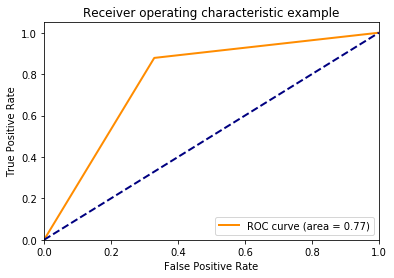

In [89]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_bin_t = label_binarize(y_test, classes=['0', '1'])
y_bin_p = label_binarize(y_pred_test, classes=['0', '1'])

n_classes = y_bin_t.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(y_test, probs_test[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin_t.ravel(), y_bin_p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
display(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import average_precision_score

#average_precision_score(y_test,probs_test[:,1],pos_label='')


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer

param={'criterion':['entropy','gini'],
       'splitter':['random','best'],
       'max_depth':[3,5,10,20],
       'min_samples_split':[100,500,3000],
       #'min_samples_leaf':[100,300,1000],
      # 'min_weight_fraction_leaf':[0,1],
       #'max_features':[None,'auto','sqrt','log2'],
       #'random_state':[0,1,2],
       #'max_leaf_nodes':[100,500,1000],
       #'min_impurity_decrease':[0,0.4],
       #'min_impurity_split':[0,0.4],
       'class_weight':['balanced',None]
      }
modelo = tree.DecisionTreeClassifier()
#auc_scorer = make_scorer(accuracy_score)
auc_scorer = make_scorer(auc)


grid_obj = GridSearchCV(modelo, param, cv=4,n_jobs=-1,scoring=auc_scorer)
y_bin_train = label_binarize(y_train, classes=[0, 1])
grid_fit = grid_obj.fit(X_train, y_bin_train.ravel())
#grid_fit = grid_obj.fit(X_train,y_train )

In [50]:
best_clf = grid_fit.best_estimator_
best_clf

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [100]:
from sklearn import tree





modelo1=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

modelo2=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

modelo3=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

modelo1.fit(X_train, y_train)
X_train2=X_train.drop(labels=['estado_civil_Married-civ-spouse'],axis=1)
modelo2.fit(X_train2, y_train)
X_train3=X_train2.drop(labels=['relaciones_Husband'],axis=1)
modelo3.fit(X_train3, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

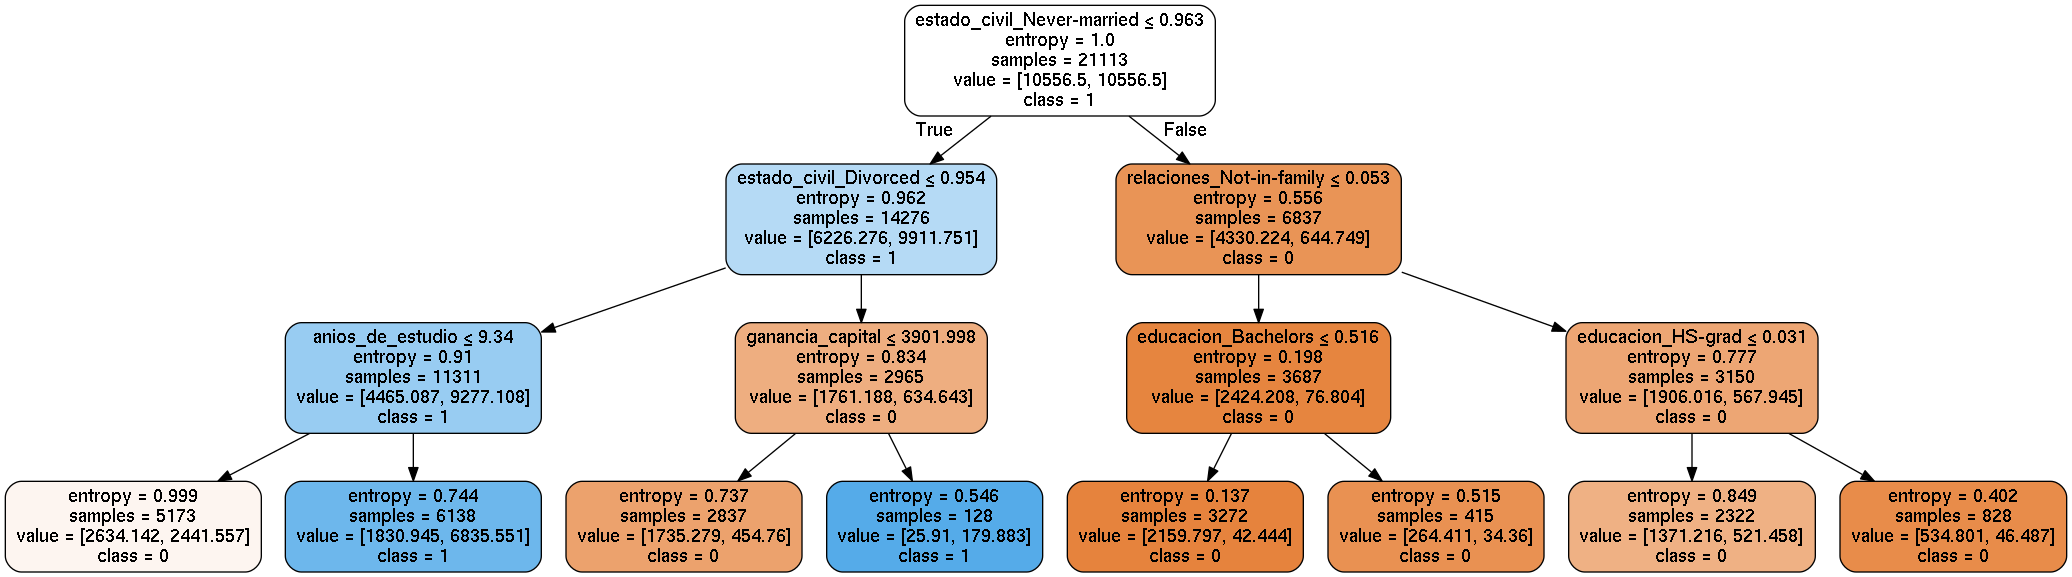

In [101]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train3.columns
export_graphviz(modelo3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

In [105]:
from sklearn.ensemble import  VotingClassifier

eclf1 = VotingClassifier(estimators=[
        ('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3)],
    voting='hard')

eclf1 = eclf1.fit(X_train,y_train)


{'micro': 0.75307659160933083}

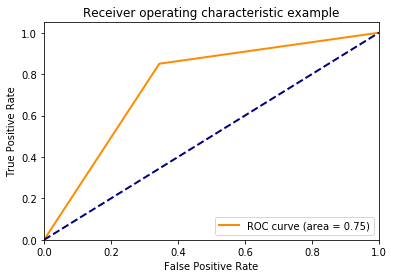

In [106]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_pred_test=eclf1.predict(X_test)

y_bin_t = label_binarize(y_test, classes=['0', '1'])
y_bin_p = label_binarize(y_pred_test, classes=['0', '1'])

n_classes = y_bin_t.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(y_test, probs_test[:, i])
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin_t.ravel(), y_bin_p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
display(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import average_precision_score

#average_precision_score(y_test,probs_test[:,1],pos_label='')


In [127]:
modelo1.feature_importances_
#importancia 
import_df=pd.DataFrame()
import_df['columnas']=X_train.columns
import_df['importancia']=modelo1.feature_importances_

import_df.sort(['importancia'],
                              ascending=[False]).head(10)




,columnas,importancia
31,estado_civil_Married-civ-spouse,0.711691
3,ganancia_capital,0.115607
53,relaciones_Own-child,0.062792
45,ocupacion_Prof-specialty,0.053514
22,educacion_Bachelors,0.051771
2,anios_de_estudio,0.004626
0,edad,0.000000
68,pais_Dominican-Republic,0.000000
76,pais_Haiti,0.000000
75,pais_Guatemala,0.000000
